# Lungs Auscultation Audios 

The auscultation is a technique to explore internal organs of the human body through the stetoscope in order to identify sounds whose are involved in some desease, like crackles and wheezes. These sounds can be identified in a time-frequency analysis, in which several statistic indices can be calculated (Variance, Range, Moving Average, Spectrum average) to build models that help to automatize the diagnosis of Crackles and Wheezes, or even some desease.

This project develops models of **regression and classification** with some of the indices described above using the data set I created in one of my university projects, in which a database of auscultation audios is analyzed, extracting each respiratory cycle from several auscultations performed on 126 patients.

The complete project can be found clicking [here](https://github.com/santiagortiiz/Lungs-Auscultation-Signals.git).

And The original audios Database can be found clicking [here](https://www.kaggle.com/vbookshelf/respiratory-sound-database)

## Let's start by importing principle libraries

In [1]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load the dataset as a DataFrame

The dataset describes each of the 126 patients in two ways, the first of which details their basic information such as age, sex, weight, BMI, and their identification. And the second describes each respiratory cycle including start time, end time, `pathologies detected`, status and `statistical indices`.

Note: The status describes the patient as follows:                                       
**State**                                                                              
0 -> Healthy (Respiratory cycle without Crackles or Wheezes)                                       
1 -> Respiratory cycle with Crackles                                       
2 -> Respiratory cycle with Wheezes                                       
3 -> Respiratory cycle with Both (Crackles and Wheezes)                                       

In [2]:
df = pd.read_excel('auscultation_features.xlsx')
df

,patient_ID,Diagnosis,age,sex,IMC,weight,height,adq_format,start,end,crackles,wheezes,state,Var,Range,Coarse_Av,Fine_Av,Spectrum Av
0,101,URTI,3.0,F,NaN,19.0,99.0,1b1_Al_sc_Meditron,0.036,0.579,0,0,0,0.000048,0.113594,0.000446,0.000599,2.537207e-08
1,101,URTI,3.0,F,NaN,19.0,99.0,1b1_Al_sc_Meditron,0.579,2.450,0,0,0,0.000066,0.159031,0.012435,-0.001276,3.532798e-08
2,101,URTI,3.0,F,NaN,19.0,99.0,1b1_Al_sc_Meditron,2.450,3.893,0,0,0,0.000044,0.115345,-0.101963,-0.000701,2.213387e-08
3,101,URTI,3.0,F,NaN,19.0,99.0,1b1_Al_sc_Meditron,3.893,5.793,0,0,0,0.000074,0.187316,-0.113660,-0.000223,3.485673e-08
4,101,URTI,3.0,F,NaN,19.0,99.0,1b1_Al_sc_Meditron,5.793,7.521,0,0,0,0.000036,0.117565,-0.017593,-0.001040,1.806783e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6893,226,Pneumonia,4.0,M,NaN,16.7,103.0,1b1_Pl_sc_LittC2SE,11.721,13.693,1,0,1,0.000015,0.056514,-0.005161,-0.005630,7.528343e-09
6894,226,Pneumonia,4.0,M,NaN,16.7,103.0,1b1_Pl_sc_LittC2SE,13.693,15.536,0,0,0,0.000026,0.107412,-0.018191,-0.000332,1.279829e-08
6895,226,Pneumonia,4.0,M,NaN,16.7,103.0,1b1_Pl_sc_LittC2SE,15.536,17.493,0,0,0,0.000017,0.089678,0.002857,0.005618,8.751189e-09
6896,226,Pneumonia,4.0,M,NaN,16.7,103.0,1b1_Pl_sc_LittC2SE,17.493,19.436,1,0,1,0.000018,0.059962,-0.004191,0.002940,8.975479e-09


In [3]:
len(df)

6898

## Preparation required based on missing data

Lets see what proportion of our dataset is `missing` and if it requires some cleaning:

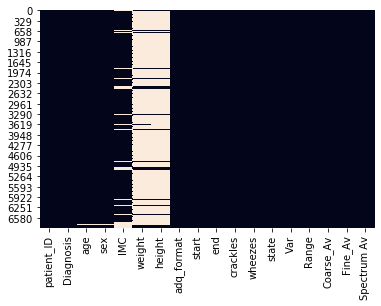

In [4]:
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [5]:
print(np.sum(df.isnull()==True))

patient_ID        0
Diagnosis         0
age              61
sex              61
IMC             894
weight         6149
height         6172
adq_format        0
start             0
end               0
crackles          0
wheezes           0
state             0
Var               0
Range             0
Coarse_Av         0
Fine_Av           0
Spectrum Av       0
dtype: int64


## Cleaning dataset

The models in which I am interested, just need the statistical features and the diagnosis, so let's drop IMC, weight, height and the adquisition format columns:

In [6]:
df.drop(['IMC','weight','height','adq_format'], axis=1, inplace=True)
features = df.columns
df

,patient_ID,Diagnosis,age,sex,start,end,crackles,wheezes,state,Var,Range,Coarse_Av,Fine_Av,Spectrum Av
0,101,URTI,3.0,F,0.036,0.579,0,0,0,0.000048,0.113594,0.000446,0.000599,2.537207e-08
1,101,URTI,3.0,F,0.579,2.450,0,0,0,0.000066,0.159031,0.012435,-0.001276,3.532798e-08
2,101,URTI,3.0,F,2.450,3.893,0,0,0,0.000044,0.115345,-0.101963,-0.000701,2.213387e-08
3,101,URTI,3.0,F,3.893,5.793,0,0,0,0.000074,0.187316,-0.113660,-0.000223,3.485673e-08
4,101,URTI,3.0,F,5.793,7.521,0,0,0,0.000036,0.117565,-0.017593,-0.001040,1.806783e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6893,226,Pneumonia,4.0,M,11.721,13.693,1,0,1,0.000015,0.056514,-0.005161,-0.005630,7.528343e-09
6894,226,Pneumonia,4.0,M,13.693,15.536,0,0,0,0.000026,0.107412,-0.018191,-0.000332,1.279829e-08
6895,226,Pneumonia,4.0,M,15.536,17.493,0,0,0,0.000017,0.089678,0.002857,0.005618,8.751189e-09
6896,226,Pneumonia,4.0,M,17.493,19.436,1,0,1,0.000018,0.059962,-0.004191,0.002940,8.975479e-09


Then, notice that only 61 values of the age and sex columns are missing, so there are two options:

1) Discard the missing data: df = df.dropna()                                                    
2) Impute the missing data

#### Lets go ahead imputing these data with the **scikit learn** library using the **SimpleImputer** class

In [7]:
from sklearn.impute import SimpleImputer

In [8]:
imp = SimpleImputer(strategy="most_frequent")
df = pd.DataFrame(imp.fit_transform(df), columns = features)

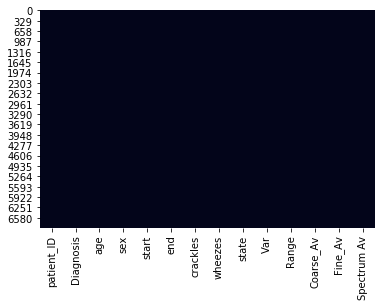

patient_ID     0
Diagnosis      0
age            0
sex            0
start          0
end            0
crackles       0
wheezes        0
state          0
Var            0
Range          0
Coarse_Av      0
Fine_Av        0
Spectrum Av    0
dtype: int64


In [9]:
sns.heatmap(df.isnull(), cbar=False)
plt.show()
print(np.sum(df.isnull()==True))

# Shuffle the dataset because:

1) Shuffled samples will help us avoid areas of the model that under/overfil the data

2) If we evaluate a movel based on data it has seen before, we may overestimate its performance

In [10]:
df = df.sample(frac=1)
df['ones'] = 1 # Intercept parameter
df

,patient_ID,Diagnosis,age,sex,start,end,crackles,wheezes,state,Var,Range,Coarse_Av,Fine_Av,Spectrum Av,ones
1473,130,COPD,85,F,17.065,19.911,1,1,3,0.000246658,0.228359,-0.0130017,-0.0118159,1.20827e-07,1
2090,140,Pneumonia,79,F,0.207,3.479,0,0,0,3.80814e-05,0.209343,0.00178729,0.00442789,1.78598e-08,1
2818,154,COPD,65,M,12.266,16.764,0,0,0,8.6154e-05,0.168467,0.00440061,0.0087567,4.19739e-08,1
810,120,COPD,78,M,29.852,32.015,0,0,0,1.62333e-05,0.0502448,-0.000388107,-0.000315144,8.12325e-09,1
5193,193,COPD,77,M,9.507,11.162,0,1,2,0.00735029,1.19805,0.0619296,-0.0735627,3.80217e-06,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4942,186,COPD,71,M,1.185,5.268,1,0,1,0.00198866,0.96295,0.00977568,0.0043438,1.03598e-06,1
1707,134,COPD,61,M,1.879,6.55,0,0,0,6.85978e-06,0.0453517,-0.00932395,-0.000557135,3.31628e-09,1
817,120,COPD,78,M,46.495,48.213,1,0,1,6.49744e-05,0.236125,0.00530234,0.00080912,3.1536e-08,1
4123,172,COPD,73,M,15.801,18.322,0,0,0,0.0131668,2.40166,-0.468886,-0.0668553,6.24007e-06,1


# 1) Regression

## 1.a) Linear Regression with Numpy
Model Generated with Numpy.linalg.lstsq (Least Square of Linear Algebra's Library)

Labels to predict:

In [11]:
y = df['state'].values.reshape(-1,1)  # -1 means that calculate the dimension of rows, but have 1 column
y = y.tolist()

Features used to predict

In [12]:
X = pd.concat([df['ones'], df.loc[:, 'Var':'Spectrum Av']], axis=1)
X

,ones,Var,Range,Coarse_Av,Fine_Av,Spectrum Av
1473,1,0.000246658,0.228359,-0.0130017,-0.0118159,1.20827e-07
2090,1,3.80814e-05,0.209343,0.00178729,0.00442789,1.78598e-08
2818,1,8.6154e-05,0.168467,0.00440061,0.0087567,4.19739e-08
810,1,1.62333e-05,0.0502448,-0.000388107,-0.000315144,8.12325e-09
5193,1,0.00735029,1.19805,0.0619296,-0.0735627,3.80217e-06
...,...,...,...,...,...,...
4942,1,0.00198866,0.96295,0.00977568,0.0043438,1.03598e-06
1707,1,6.85978e-06,0.0453517,-0.00932395,-0.000557135,3.31628e-09
817,1,6.49744e-05,0.236125,0.00530234,0.00080912,3.1536e-08
4123,1,0.0131668,2.40166,-0.468886,-0.0668553,6.24007e-06


In [13]:
X = np.matrix(X, dtype = float)
X = X.tolist()

In [14]:
print(np.shape(X), type(X))
print(np.shape(y), type(y))

(6898, 6) <class 'list'>
(6898, 1) <class 'list'>


In [15]:
theta, residuals, rank, s = np.linalg.lstsq(X, y, rcond = None)

In [16]:
theta

array([[ 6.25792526e-01],
       [-1.82641935e+02],
       [ 2.18285781e-01],
       [ 2.46472680e-02],
       [-8.22214973e-02],
       [ 3.86809005e+05]])

Model Generated:                                                     
State = theta_0 + theta_1xVariance + theta_2xRange + theta_3xCoarse_Av + theta_4xFine_Av + theta_5xSpectrum_Av

## 1.b) Linear Regression with Sickit Learn

In [17]:
from sklearn.linear_model import LinearRegression

Take the one half of the data for training, and the other one for testing

In [18]:
N = len(X)
X_train = X[:N//2] # First half to train
X_test = X[N//2:] # Last half to test
y_train = y[:N//2]
y_test = y[N//2:]

Create the instance of the class LinearRegression() and fit it with the training parameters.         
**This will be the model**

In [19]:
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X_train, y_train)  # perform linear regression

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Generate the predictions of the model with the training and testing data

In [20]:
y_pred_with_X_train = linear_regressor.predict(X_train)  # make predictions
y_pred_with_X_test = linear_regressor.predict(X_test)

Plotting a portion of the predictions and compare with the originals

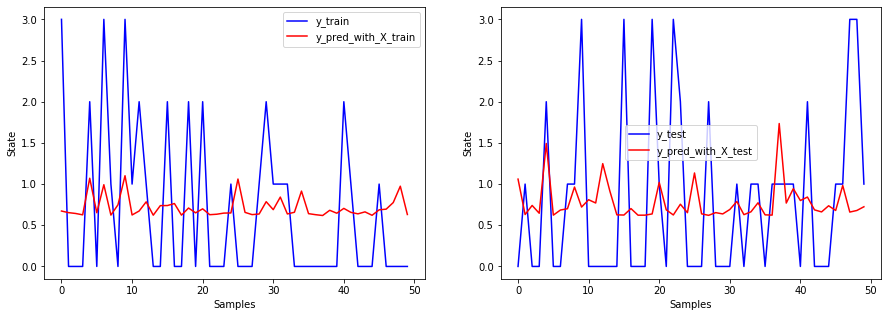

In [21]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(y_train[:50], color='blue')
plt.plot(y_pred_with_X_train[:50], color='red')
plt.xlabel('Samples')
plt.ylabel('State')
plt.legend(['y_train','y_pred_with_X_train'])

plt.subplot(1,2,2)
plt.plot(y_test[:50], color='blue')
plt.plot(y_pred_with_X_test[:50], color='red')
plt.xlabel('Samples')
plt.ylabel('State')
plt.legend(['y_test','y_pred_with_X_test'])
plt.show()

**Conclusion:** The Linear Regression Model can't fit the state of the patients

# 2) Classification

## 2.a) Nearest Neighbors with Scikit learn

In [22]:
from sklearn.neighbors import KNeighborsClassifier 

In [23]:
X = pd.concat([df['ones'], df.loc[:, 'Var':'Spectrum Av']], axis=1)
y = df['state']

In [24]:
N = len(X)
X_train = X[:N//2] # First half to train
X_test = X[N//2:] # Last half to test
y_train = y[:N//2]
y_test = y[N//2:]

Create the instance of the class KNeighborsClassifier with the selected **k**, and train this model

In [25]:
k = 5
nearest_neighbors = KNeighborsClassifier(n_neighbors = k) 
nearest_neighbors.fit(X_train.values.tolist(), y_train.values.tolist())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Make Predictions with the model created, using the training/testing dataset

In [26]:
y_pred_with_X_train = nearest_neighbors.predict(X_train)
y_pred_with_X_test = nearest_neighbors.predict(X_test)

Compare Predicted values with the train and test datas

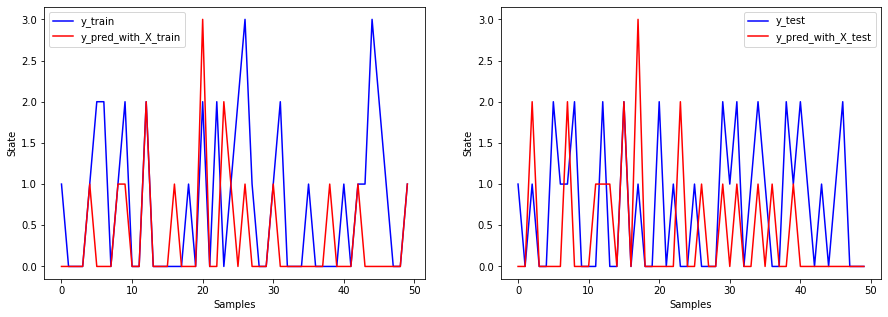

In [27]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(y_train[2000:2050].values, color='blue')
plt.plot(y_pred_with_X_train[2000:2050], color='red')
plt.xlabel('Samples')
plt.ylabel('State')
plt.legend(['y_train','y_pred_with_X_train'])

plt.subplot(1,2,2)
plt.plot(y_test[2000:2050].values, color='blue')
plt.plot(y_pred_with_X_test[2000:2050], color='red')
plt.xlabel('Samples')
plt.ylabel('State')
plt.legend(['y_test','y_pred_with_X_test'])
plt.show()

In [28]:
percentage_good_predictions_with_X_train = y_pred_with_X_train == y_train.values
percentage_good_predictions_with_X_train = sum(percentage_good_predictions_with_X_train) / len(percentage_good_predictions_with_X_train)
print('% Good Predictions with known data: ' + str(percentage_good_predictions_with_X_train))

percentage_good_predictions_with_X_test = y_pred_with_X_test == y_test.values
percentage_good_predictions_with_X_test = sum(percentage_good_predictions_with_X_test) / len(percentage_good_predictions_with_X_test)
print('% Good Predictions with unknown data: ' + str(percentage_good_predictions_with_X_test))

% Good Predictions with known data: 0.6213395187010727
% Good Predictions with unknown data: 0.47781965787184694


If you wish, you can modify "k" or the range of plot and run the lines here to verify its effect

**Conclusion:** Nearest Neighbors Model doesn't have a high hit rate with any k-value, but with `k=1` it get's a percentage of prediction of `100% with knowns data`, but very poor percentage with unknown data. On the other hand, the `better percentage` of prediction for `unknow data`, is about `50%` with some values of k.

## 2.b) Support Vector Machines

In [29]:
from sklearn.svm import SVR, SVC
from sklearn.metrics import accuracy_score

Another form to get the train/test dataset from sickit learn's library

In [30]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train, y_test = train_test_split(X, y, random_state=0)

Create and train the instance of the class **SVR** or SVC from SVMs

In [31]:
clf = SVR()
clf.fit(X_train.values.tolist(), y_train.values.tolist())

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Generate predictions using the training/testing dataset with the model created

In [32]:
y_pred_with_X_train = clf.predict(X_train.values.tolist())
y_pred_with_X_test = clf.predict(X_test.values.tolist())

Comparison between predicted and original values with each dataset

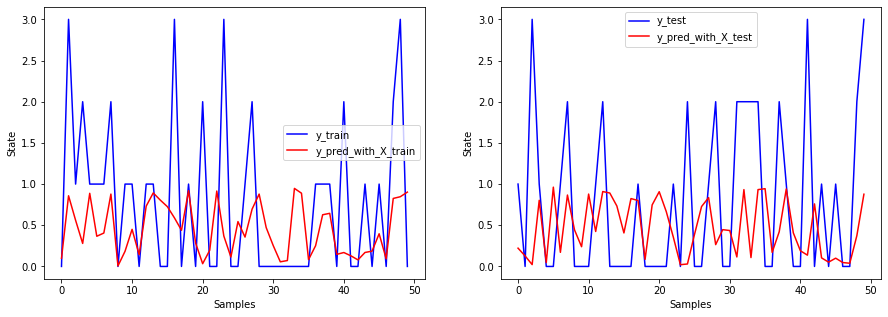

In [33]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(y_train[0:50].values, color='blue')
plt.plot(y_pred_with_X_train[0:50], color='red')
plt.xlabel('Samples')
plt.ylabel('State')
plt.legend(['y_train','y_pred_with_X_train'])

plt.subplot(1,2,2)
plt.plot(y_test[0:50].values, color='blue')
plt.plot(y_pred_with_X_test[0:50], color='red')
plt.xlabel('Samples')
plt.ylabel('State')
plt.legend(['y_test','y_pred_with_X_test'])
plt.show()

**Conclusion:** As in the linear regression model, the predicted responses do not match the real ones, because this is not a good model for the system

## 2.c) Gradient Descent with TensorFlow

In [34]:
import tensorflow as tf

C:\Users\SANTIAGO\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\SANTIAGO\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\SANTIAGO\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\SANTIAGO\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWa

In [35]:
X = pd.concat([df['ones'], df.loc[:, 'Var':'Spectrum Av']], axis=1)
y = df['state']

In [36]:
y = tf.constant(y.values.tolist(), dtype = float, shape=[len(y),1])
y

<tf.Tensor 'Const:0' shape=(6898, 1) dtype=float32>

In [37]:
K = len(X.values[0])
K

6

In [38]:
theta = tf.Variable(tf.constant([0.0]*K, shape=[K,1]))
theta

<tf.Variable 'Variable:0' shape=(6, 1) dtype=float32_ref>

In [39]:
optimizer = tf.train.AdamOptimizer(0.01)

In [40]:
def MSE(X, y, theta):
    return tf.reduce_mean((tf.matmul(X, theta) - y)**2)

**note:** The function tf.matmul(a,b) need that a & b have the **same data type**

In [41]:
objective = MSE(X.values.tolist(), y, theta)

In [42]:
train = optimizer.minimize(objective)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [43]:
init = tf.global_variables_initializer()

In [44]:
sess = tf.Session()
sess.run(init)

In [45]:
for iteration in range(1000):
    cvalues = sess.run([train, objective])
    print("objective = " + str(cvalues[1]))

objective = 1.4441867
objective = 1.420995
objective = 1.3983029
objective = 1.3761199
objective = 1.3544521
objective = 1.3333085
objective = 1.3126944
objective = 1.2926154
objective = 1.2730768
objective = 1.2540829
objective = 1.235637
objective = 1.217741
objective = 1.2003975
objective = 1.1836073
objective = 1.1673698
objective = 1.151684
objective = 1.136548
objective = 1.1219592
objective = 1.107914
objective = 1.0944078
objective = 1.0814348
objective = 1.06899
objective = 1.0570656
objective = 1.0456547
objective = 1.034749
objective = 1.0243396
objective = 1.0144168
objective = 1.0049707
objective = 0.9959905
objective = 0.98746616
objective = 0.97938514
objective = 0.971736
objective = 0.9645061
objective = 0.95768285
objective = 0.9512533
objective = 0.94520396
objective = 0.9395222
objective = 0.9341933
objective = 0.92920417
objective = 0.9245405
objective = 0.92018837
objective = 0.91613406
objective = 0.91236395
objective = 0.9088637
objective = 0.9056203
objective = 

In [46]:
with sess.as_default():
    print(MSE(X.values.tolist(), y, theta).eval())
    print(theta.eval())

0.86489314
[[ 6.1612320e-01]
 [ 3.0784912e+00]
 [ 2.7023834e-01]
 [-7.7528815e-04]
 [ 3.4751575e-02]
 [ 3.0014188e+00]]


**Conclusion:** Gradient Descent with tensor flow is the best option to make predictions of the state of a patient based on the statistic indices of their respiratorie's cycles. And MSE close to 0 indicates good model performance.

In Addition, i hope that the validation of each model, will be teach in next courses!

# Bibliography

- 1 Numpy Linear Algebra (Regression):   
https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html                         


- 2 Imputation of missing values:                                                                   
https://scikit-learn.org/stable/modules/impute.html                 


- 3 Logistic Regression with Scikit Learn:                                               
https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression                       
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


- 4 Nearest Neighbors with Scikit Learn:                                                             
https://scikit-learn.org/stable/modules/neighbors.html#classification                       
https://scikitlearn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier


- 5 Support Vector Machines with Scikit Learn:
https://scikit-learn.org/stable/modules/svm.html#svm-classification                               
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.svm                             
https://en.wikipedia.org/wiki/Support-vector_machine                                            
https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47


- 6 Gradient descent with TensorFlow:                                                                 
https://en.wikipedia.org/wiki/Gradient_descent


- 7 Buit in Functions in Python:                                                                  
https://docs.python.org/3/library/functions.html